In [6]:
# 1. 데이터 로드하고 구조 확인
# pandas는 데이터 로드와 조작을 위해 사용
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('housingdata (2).csv')     

# 데이터 확인
# 데이터를 처음 로드했으니, 구조와 샘플 데이터를 확인.
# 이렇게 하면 데이터가 어떤 형태인지, 결측치가 있는지 한눈에 알 수 있음.
print("데이터 처음 몇 줄 보기:")
print(data.head())
print("\n데이터 구조 확인:")
data.info()       

데이터 처음 몇 줄 보기:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

데이터 구조 확인:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX 

In [9]:
# 2. 결측치 처리하기
# 결측치가 있으면 모델 학습에 방해되니까 채워야겠다고 생각함.
# 평균값으로 대체하는 방법이 좀 더 손쉬워서 이 방식을 사용.
data_filled = data.copy() #원본 데이터를 그대로 복사하는 코드 => 원본 데이터를 그대로 보존하여 손상 없이 처리 등을 위한 재사용 가능

# 2.1 결측치 확인
# 각 열의 결측치 개수를 출력하여 확인
print("\n결측치 개수 확인:")
print(data.isnull().sum())

# 2.2 결측치 처리
# 결측치가 있는 열을 평균값으로 대체
for column in data.columns:
    if data[column].isnull().sum() > 0:
        print(f"{column} 열에 결측치 {data[column].isnull().sum()}개 있음. 평균값으로 채움.")
        data_filled[column] = data[column].fillna(data[column].mean())

# 2.3 결측치 처리 결과 확인
print("\n결측치 처리 완료 후:")
print(data_filled.isnull().sum())



결측치 개수 확인:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
CRIM 열에 결측치 20개 있음. 평균값으로 채움.
ZN 열에 결측치 20개 있음. 평균값으로 채움.
INDUS 열에 결측치 20개 있음. 평균값으로 채움.
CHAS 열에 결측치 20개 있음. 평균값으로 채움.
AGE 열에 결측치 20개 있음. 평균값으로 채움.
LSTAT 열에 결측치 20개 있음. 평균값으로 채움.

결측치 처리 완료 후:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64



박스플롯 기준 이상치 제거 진행 중...


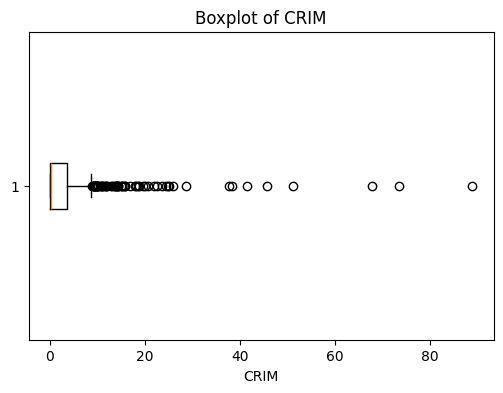

CRIM 열에서 64개 제거됨.


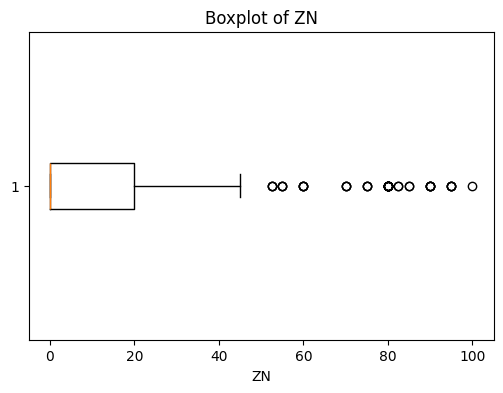

ZN 열에서 44개 제거됨.


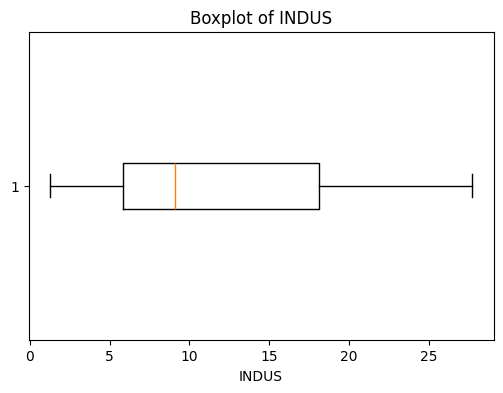

INDUS 열에서 0개 제거됨.


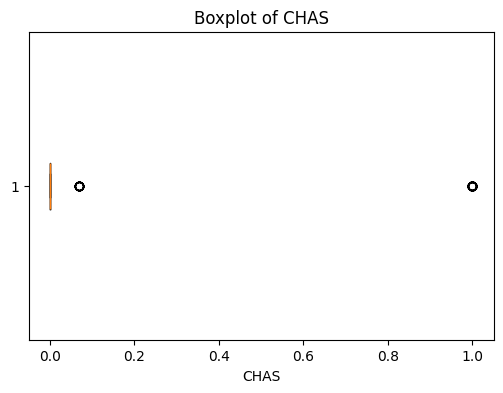

CHAS 열에서 46개 제거됨.


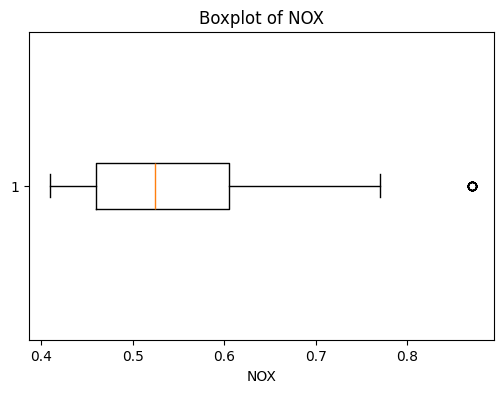

NOX 열에서 12개 제거됨.


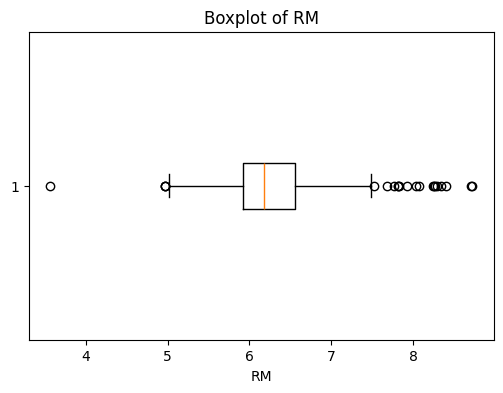

RM 열에서 21개 제거됨.


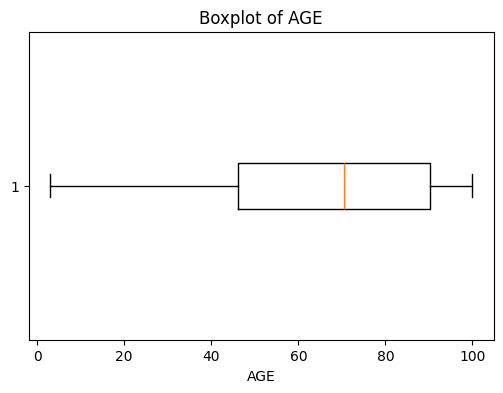

AGE 열에서 0개 제거됨.


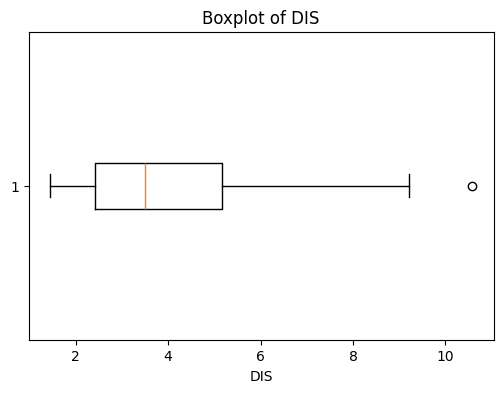

DIS 열에서 1개 제거됨.


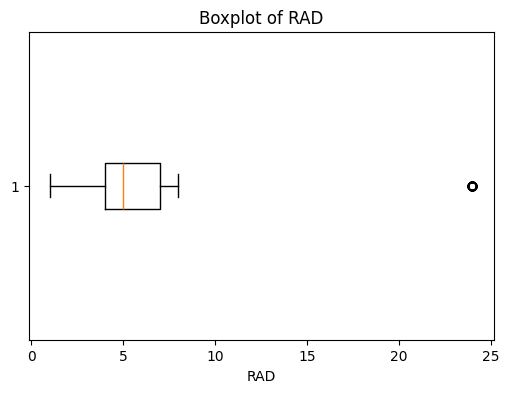

RAD 열에서 54개 제거됨.


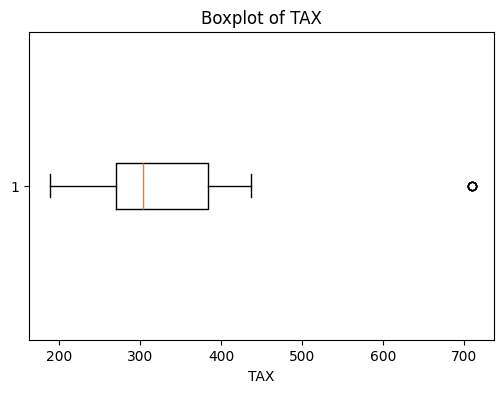

TAX 열에서 5개 제거됨.


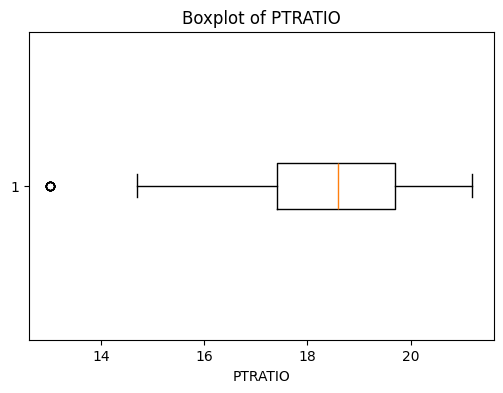

PTRATIO 열에서 8개 제거됨.


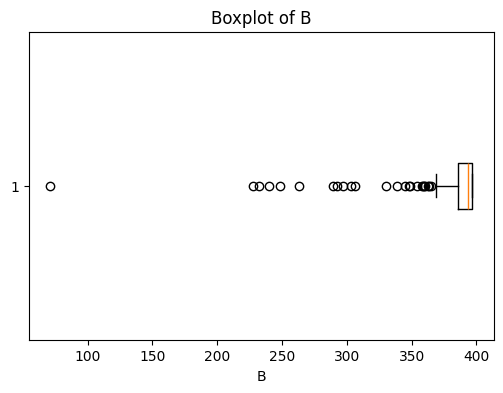

B 열에서 24개 제거됨.


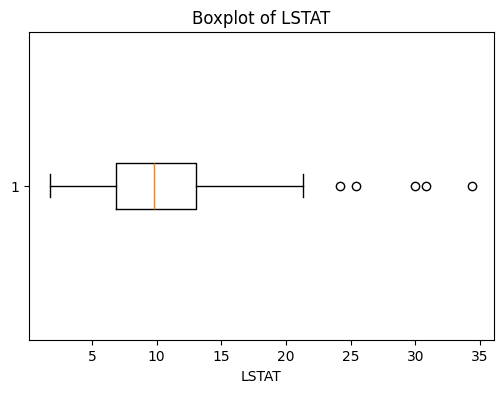

LSTAT 열에서 5개 제거됨.

이상치 제거 전 데이터 크기: (506, 14)
이상치 제거 후 데이터 크기: (222, 14)


In [10]:
# 3. 박스플롯으로 이상치 제거하기
# matplotlib는 데이터 시각화 도구로 사용
import matplotlib.pyplot as plt

# 박스플롯을 그려서 이상치를 시각적으로 확인한 후 제거함.
# 시각화를 통해 데이터의 분포를 확인하고 작업의 신뢰성을 높이기 위함.
def plot_and_remove_outliers(df, columns):
    for column in columns:
        # 3.1 박스플롯 그리기
        plt.figure(figsize=(6, 4))
        plt.boxplot(df[column], vert=False)
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column)
        plt.show()

        # 3.2 이상치를 판단할 기준 계산
        lower_limit = df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
        upper_limit = df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))

        # 3.3 기준을 넘어가는 값 제거
        before = df.shape[0]
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
        after = df.shape[0]
        print(f"{column} 열에서 {before - after}개 제거됨.")
    return df

# 박스플롯 기준 이상치 제거 실행
print("\n박스플롯 기준 이상치 제거 진행 중...")
data_boxplot_cleaned = plot_and_remove_outliers(data_filled, data_filled.columns[:-1])

# 데이터 크기 비교
print("\n이상치 제거 전 데이터 크기:", data_filled.shape)
print("이상치 제거 후 데이터 크기:", data_boxplot_cleaned.shape)

In [11]:
# 4. 특징 데이터와 목표 변수 나누기
# 목표는 집 값 예측이라 'MEDV'를 목표 변수로 설정.
# 나머지 열은 집 값 예측에 필요한 입력 데이터로 사용.
X = data_boxplot_cleaned.drop(columns=['MEDV'])
y = data_boxplot_cleaned['MEDV']
print("\n입력 데이터(X) 크기:", X.shape)
print("목표 데이터(y) 크기:", y.shape)



입력 데이터(X) 크기: (222, 13)
목표 데이터(y) 크기: (222,)


In [12]:
# 5. 데이터 나누기
# scikit-learn의 train_test_split은 데이터를 훈련과 테스트로 나누는 데 사용
from sklearn.model_selection import train_test_split

# 5.1 데이터 나누기 실행
# 훈련 데이터와 테스트 데이터를 나눠야 모델 성능을 평가할 수 있음.
# 80:20 비율로 나누는 게 일반적이라 이 방식을 사용함.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5.2 데이터 나누기 결과 출력
print("훈련 데이터 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 크기:", X_test.shape, y_test.shape)


훈련 데이터 크기: (177, 13) (177,)
테스트 데이터 크기: (45, 13) (45,)


In [13]:
# 6. 여러 모델 학습하고 비교하기
# scikit-learn에서 제공하는 회귀 모델을 사용
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 6.1 모델 정의
# 각 모델을 학습시키고 성능을 비교하기 위해 반복문을 사용.
# 반복문을 사용하면 모델 추가나 변경이 쉬움.
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

performance = {}

# 6.2 모델 학습 및 평가
for model_name, model in models.items():
    print(f"{model_name} 모델 학습 시작...")
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)  # 예측하기

    # 6.3 성능 평가하기
    mae = mean_absolute_error(y_test, y_pred)  # 평균 절대 오차 계산
    mse = mean_squared_error(y_test, y_pred)  # 평균 제곱 오차 계산
    r2 = r2_score(y_test, y_pred)  # R² 점수 계산
    performance[model_name] = {"MAE": mae, "MSE": mse, "R²": r2}

# 6.4 성능 비교 결과 출력
print("\n모델 성능 비교 결과:")
performance_df = pd.DataFrame(performance).T
print(performance_df)

Linear Regression 모델 학습 시작...
Decision Tree 모델 학습 시작...
Random Forest 모델 학습 시작...

모델 성능 비교 결과:
                        MAE        MSE        R²
Linear Regression  2.400062  14.067412  0.685160
Decision Tree      2.797778  21.536667  0.517992
Random Forest      2.526022  17.565762  0.606864


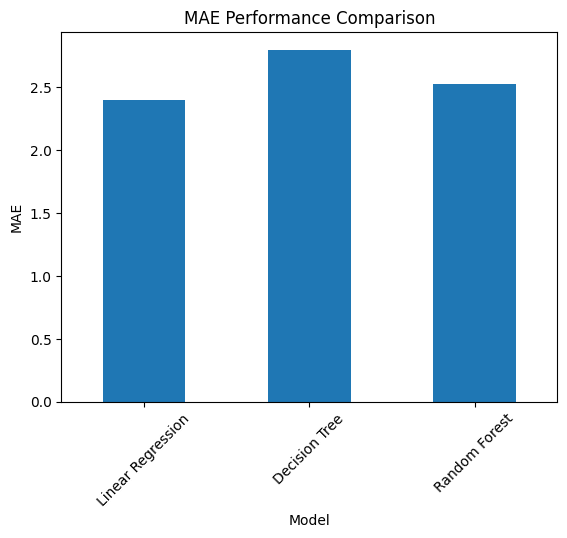

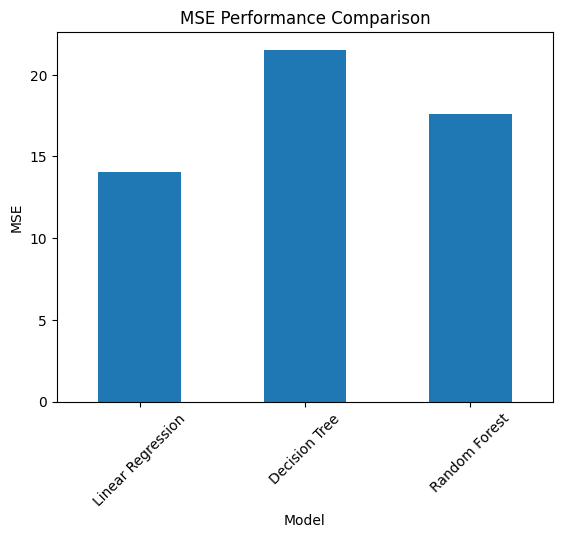

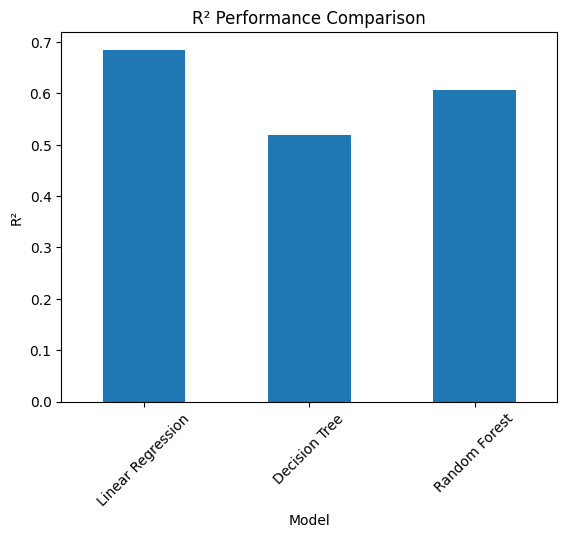

In [19]:
# 7. 성능 시각화하기
#성능 비교를 시각적으로 보기 위해 막대 그래프를 그려봄.
import matplotlib.pyplot as plt

# 기본 폰트 설정 (DejaVu Sans)
plt.rcParams['font.family'] = 'DejaVu Sans'  # matplotlib의 기본 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 성능 시각화
for metric in ["MAE", "MSE", "R²"]:
    performance_df[metric].plot(kind='bar', title=f"{metric} Performance Comparison", ylabel=metric, xlabel="Model")
    plt.xticks(rotation=45)
    plt.show()


최고 성능 모델: Linear Regression


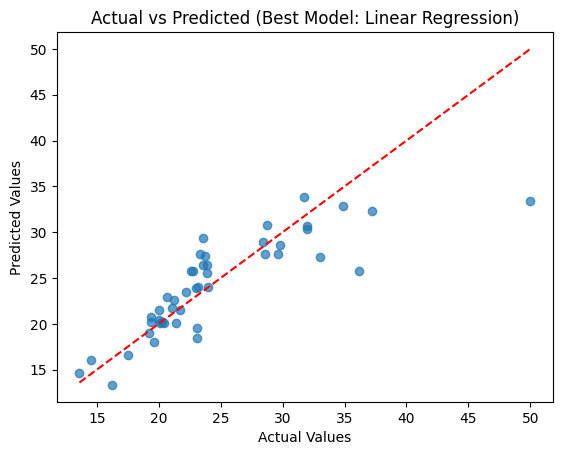

In [20]:
# 8. 최적 모델로 분석하기
# R² 점수가 가장 높은 모델을 선택하여 분석 진행.
# 최적 모델로 예측 값과 실제 값을 비교해보기 위해 산점도 작성.
best_model_name = performance_df["R²"].idxmax() #idxmax()는 시리즈의 값 중에서 가장 큰 값을 가진 인덱스를 반환.
best_model = models[best_model_name]
print(f"최고 성능 모델: {best_model_name}")
y_pred_best = best_model.predict(X_test)

# 실제 값 vs 예측 값 비교
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f"Actual vs Predicted (Best Model: {best_model_name})")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()